*First, make sure that you correctly installed all packages by running the following code block:*

In [10]:
from graph_utils.graph import Graph, nx, plt
from graph_utils.buss_graph import BussGraph
from graph_utils.tree_graph import TreeGraph
from graph_utils.ring_graph import RingGraph
from graph_utils.star_graph import StarGraph
from graph_utils.grid_graph import GridGraph
from graph_utils.mesh_graph import MeshGraph
from graph_utils.constructed_graph import ConstructedGraph
from graph_utils.watts_strogatz import WattsStrogatz
from graph_utils.barabasi_albert import BarabasiAlbert
from graph_utils.real_network_graph import RealNetworkGraph
from graph_utils.vdes_graph import VDESGraph
from graph_utils.get_network import get_network
import matplotlib
import numpy as np
import random

*Please go through the introduction notebook. All tools that you need are explained there.*

In [18]:
student_seed = 10103
random.seed(student_seed)

# Introduction
In this exercise shall we learn about different ways to measure the importance or centrality of a node in a network. We will furthermore encounter different graph types, learn about simple analytical methods and finally look at random and intented network failures.

Knowledge of the following topics is expected after completeing this exercise:
* Centralities
* Measurements for connecting networks
    * size of the largest component
* Attack targets in a network
    * Importance of a node
    * Attack strategies in a network
* Robustness
    * Redundancy
* Costs of redundancy/trade-off with effect of them


To be able to carry out the exercise, it is expected that the introduction task have been carried our and that you are able to use all tools as they have been introduced. For the following tasks, short and precise answers are expected from the student. 

# Part 1: Graph structures and centralities
In this part, we will introduce measures for the importance of a node in a network. We will learn about three different standard measures:   
* degree centrality
* betweenness centrality
* closeness centrality. 

We will also have a closer look on different graph types and analyse there advantages and disadvantages.

## Task 1.1
In this task will we learn how to plot graphs.  

### Task 1.1.1
Simple graph structures that are often used are mesh, star, ring, tree and bus. With the help of the methods introduced in the introduction, construct and print a simple version of three of these graphs (5-10 nodes).

<em> We expect to see three graph types constructed and printed.</em>

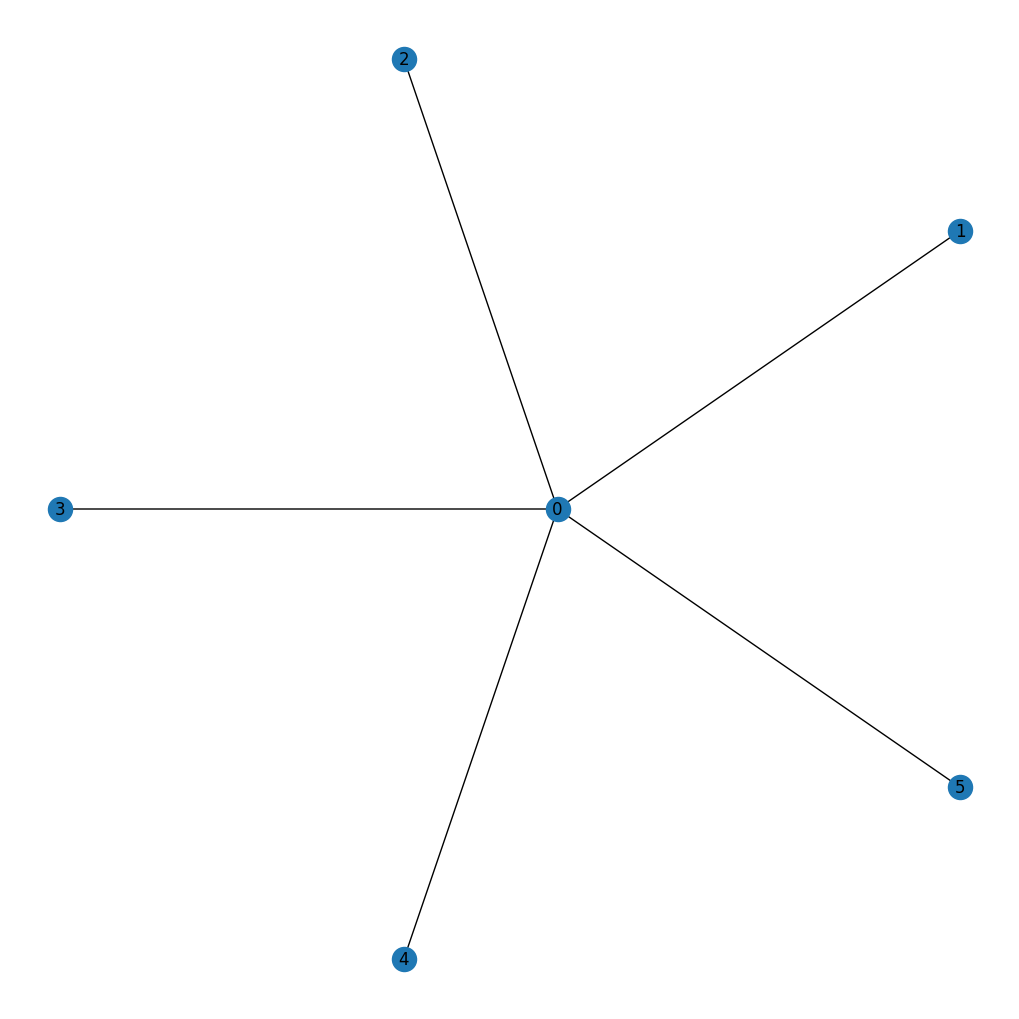

In [51]:
num_nodes = 5 # Less to calculate...
star_graph = StarGraph(n=num_nodes)
star_graph.draw() # By 'printed' in the assignment-text, I assume to draw / plot

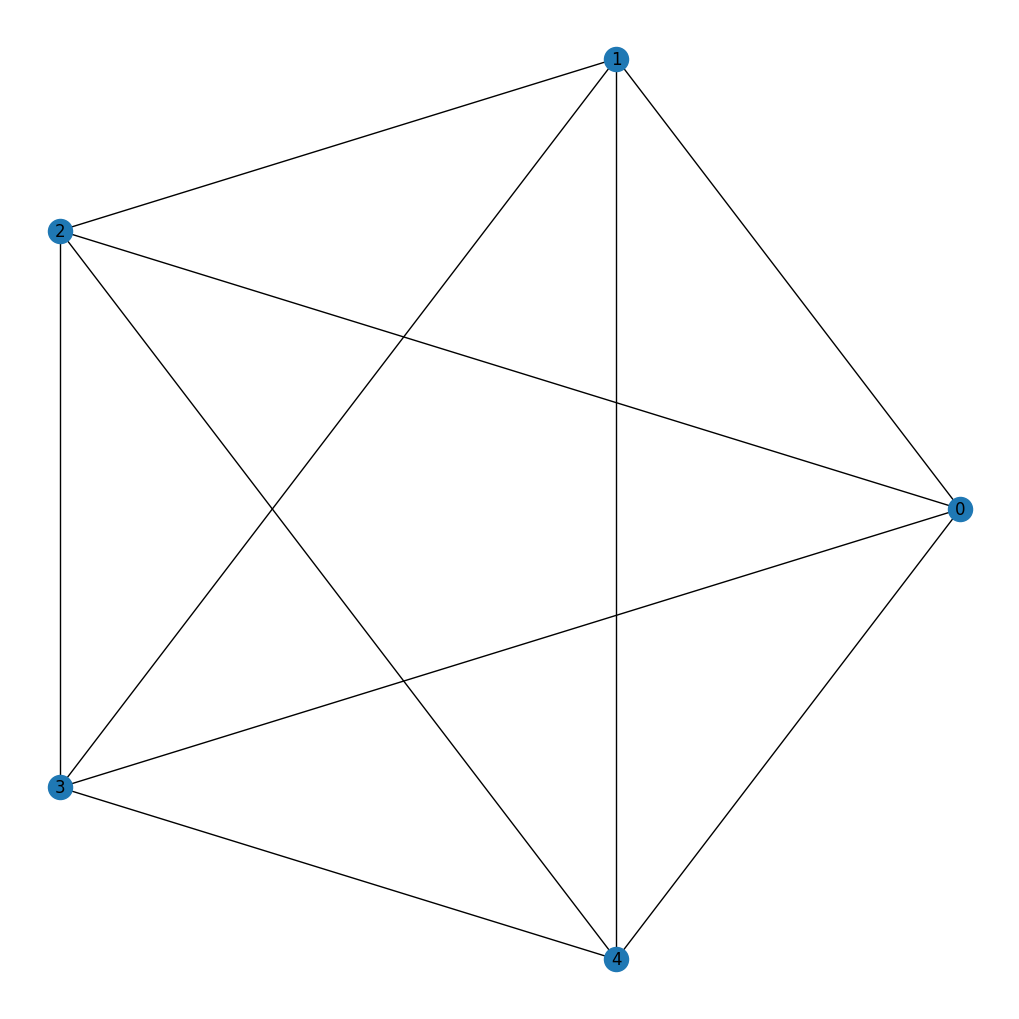

In [52]:
mesh_graph = MeshGraph(n=num_nodes)
mesh_graph.draw()


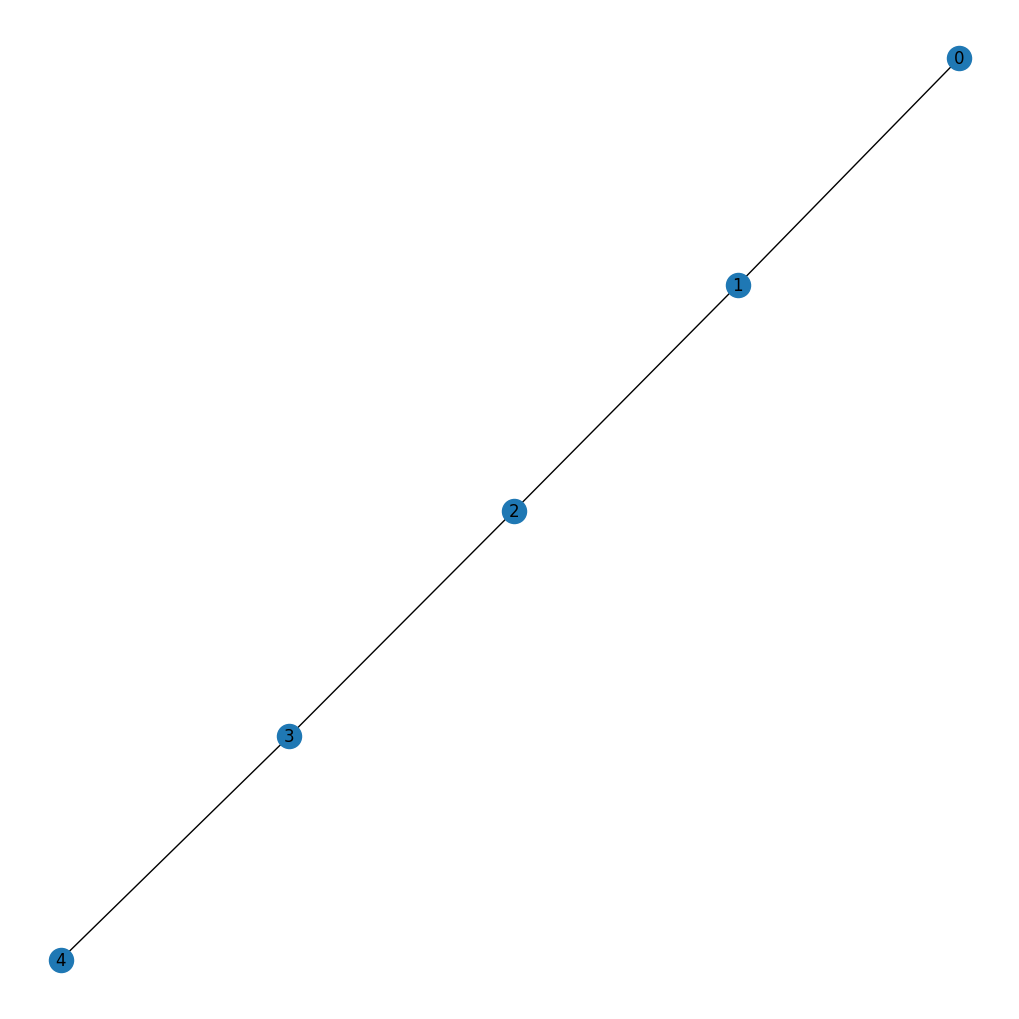

In [53]:
bus_graph = BussGraph(n=num_nodes) # Who tf cannot correct the class-name to 'BusGraph'?
bus_graph.draw()

### Task 1.1.2
Construct a **connected** graph by constructing at first an object of the class <code> Graph </code>. Then, add 5-10 nodes with the method <code>add_node()</code> or <code>add_nodes_from()</code>. Then add edges between nodes chosen by you using the method <code>add_edge()</code> or <code>add_edges_from()</code>. Finally, use the method <code>draw()</code> to draw the graph. The graph is supposed to have between 5 and 10 nodes.

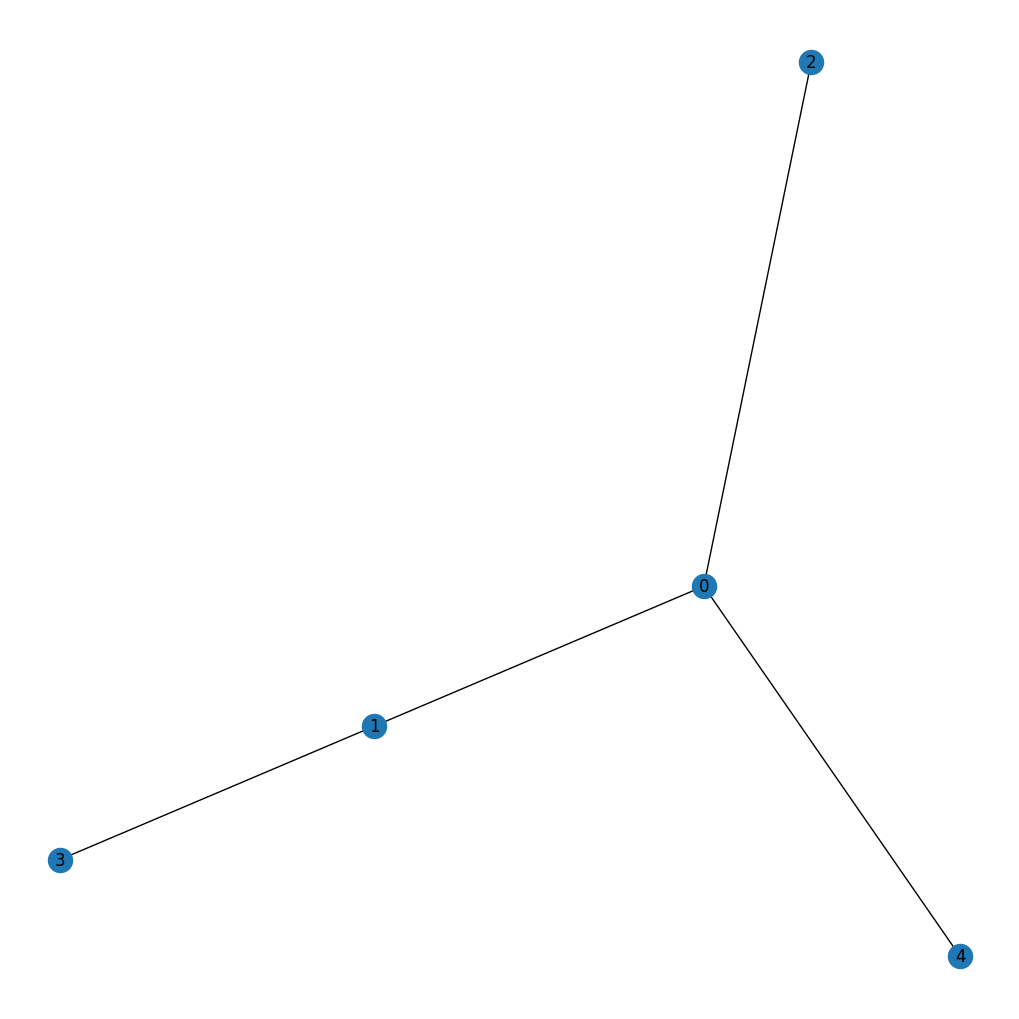

In [41]:
random.seed(student_seed)
graph = Graph()
graph.add_nodes_from([node_idx for node_idx in range(num_nodes)])

# Making something slightly random at least
# Could be optimized though
disconnected_nodes = [*range(num_nodes)]
connected_nodes = []
edges = []

while len(disconnected_nodes) > 0:
  node_i = random.choice(disconnected_nodes)
  disconnected_nodes.remove(node_i)
  if not edges:
    node_j = random.choice(disconnected_nodes)
    disconnected_nodes.remove(node_j)
    connected_nodes.append(node_j)
  else:
    node_j = random.choice(connected_nodes)
  connected_nodes.append(node_i)

  edges.append((node_i, node_j))


graph.add_edges_from(edges) 
graph.draw()



## Task 1.2
For each of the graphs from task 1.1.1 and 1.1.2, get the node with the highest **degree centrality** by hand. Show your calculations and explain the importance of a node with high degree centrality for the network.

<em> We expect to see that the students have understood what the notion degree centrality means, and that they got the most node with the highest degree centrality. We also expect to see the calculations, to acertain that the students have not found the node by using one of the following methods. Finally, we expect a commentary, explaining the importance of the node.</em>

In [9]:
# Stargraph with 5 leaf-nodes

# The degree centrability marks the number of edges a vertex is connected to. This means that the 
# highest degree centrability for a graph would be the node in said graph with the most connected
# edges 

# Node-idx:   Num edges:
# 0           5           
# 1           1           
# 2           1                
# 3           1           
# 4           1           
# 5           1           

# For the star-graph, this is the node in the center (node-idx = 0), which has a degree-centrality 5

# Numbers 'calculated' directly from the graph

# The central node in the stargraph is extremely important, as it is connecting all of the other nodes.
# If this disconnects / gets a fatal error, it is impossible for the other nodes to communicate   

In [10]:
# Mesh, fully connected by 5 nodes 

# Node-idx:   Degree centrality:
# 0           4
# 1           4
# 2           4
# 3           4
# 4           4

# For a fully connected mesh with n nodes, each node will have a centrality index of n - 1
# This means that all nodes are equally important 

# If a node fails, the rest of the network will continue working, since there are enough other
# connections in the mesh. This makes it robust against failures, however really expensive to
# develop and maintain, as one requires connections (assuming a fully connected mesh) to all 
# other nodes 

In [11]:
# Bus consisting of 5 nodes 

# Node-idx:   Degree centrality:
# 0           1
# 1           2
# 2           2
# 3           2
# 4           1

# The edges of a bus-graph have a centrality index of 1, while all other nodes have a centrality
# index of 2 
# The 'internal' nodes are therefore the most important with respect to the centrality index

# If a failure occur in one of the 'internal' nodes (aka nodes with node-index 1,2,3), the 
# entire graph is split into two parts. Some of the nodes will become separated, and not
# allow for any communications 


In [12]:
# Custom, random graph from task 1.1.2 

# Node-idx:   Degree centrality:
# 0           3
# 1           2
# 2           1
# 3           1
# 4           1

# Node with index 0 has a degree of 3, which implies it is the most important node in the 
# network

# This graph has similarities with both the bus-graph and the star-graph. If node 0 disconnects,
# the graph will be left with a connection between nodes 1 and 3, while nodes 2 and 4 are left
# isolated. This means that 1 and 3 will be able to communicate between each other, but not to
# the nodes 2 or 4

## Task 1.3
For each graph, get the node with the highest **betweenness centrality** by hand. Show your calculations and explain the importance of a node with a high betweenness centrality for the network.  

<em> We expect to see that the students have understood what the notion of betweenness centrality means, and that they got the the node having the highest one. We also expect to see the calculations to acertain that the answer has not been found by one of the methods below. Finally, we expect a short commentary about why this node is important.</em>

In [47]:
# Stargraph with 5 leaf-nodes

# The betweenness centrality describes the number of shortest paths travelling through said node 
# relative to the number of existing shortest paths

# Node-idx:   Number of shortest paths through node-idx:    Number of shortest paths from node s to node t, not including node-idx:   Betweenness-centrality:
# 0           4 + 3 + 2 + 1 = 10                            10                                                                        10 / 10 = 1
# 1           0                                             10                                                                         0 / 10 = 0
# 2           0                                             10                                                                         0 / 10 = 0
# 3           0                                             10                                                                         0 / 10 = 0
# 4           0                                             10                                                                         0 / 10 = 0
# 5           0                                             10                                                                         0 / 10 = 0

# Node with idx = 0 is the one with the highest betweenness centrality, as all shortest paths
# from any node, must traverse through this center node


In [49]:
# Fully connected mesh with 5 nodes


# Node-idx:   Number of shortest paths through node-idx:    Number of shortest paths from node s to node t, not including node-idx:   Betweenness-centrality:
# 0           0                                             3                                                                         0 / 3 = 0
# 1           0                                             3                                                                         0 / 3 = 0
# 2           0                                             3                                                                         0 / 3 = 0
# 3           0                                             3                                                                         0 / 3 = 0
# 4           0                                             3                                                                         0 / 3 = 0

# None of the nodes will have the shortest between an arbitary set of nodes through itself, 
# as the edge between the nodes s and t will be the shortest path. Why go over 2 edges when 
# it is sufficient with 1 

# All of the nodes have the same betweenness centrality, making them equally important.

In [55]:
# Bus-graph with 5 nodes

# Some examples of the shortest paths occuring:
# Start:        End:
# 0             1
# 0             2
# 0             3
# ...
# 2             4
# 3             4

# The nodes on the edges will have no other shortest paths moving through them 

# Node-idx:   Number of shortest paths through node-idx:    Number of shortest paths from node s to node t, not including node-idx:   Betweenness-centrality:
# 0           0                                             6                                                                         0 / 6 = 0
# 1           3                                             6                                                                         3 / 6 = 0.5
# 2           4                                             6                                                                         4 / 6 = 2 / 3
# 3           3                                             6                                                                         3 / 6 = 0.5
# 4           0                                             6                                                                         0 / 6 = 0

# Node with index 2 in the bus, known as the center node, has the highest number of shortest paths running
# through itself. The center node (idx = 2) have has more shortest paths than the other nodes, due to the
# symmetry. There are more mathematical combinations of shortest paths through node with idx = 2 compared
# to the other nodes 


In [17]:
# Custom graph with 5 nodes

# The nodes on the edges will have no other shortest paths moving through them 

# Node-idx:   Number of shortest paths through node-idx:    Number of shortest paths from node s to node t, not including node-idx:   Betweenness-centrality:
# 0           0                                             6                                                                         0 / 6 = 0
# 1           3                                             6                                                                         3 / 6 = 0.5
# 2           4                                             6                                                                         4 / 6 = 2 / 3
# 3           3                                             6                                                                         3 / 6 = 0.5
# 4           0                                             6                                                                         0 / 6 = 0

# Node with index 2 in the bus, known as the center node, has the highest number of shortest paths running
# through itself. The center node (idx = 2) have has more shortest paths than the other nodes, due to the
# symmetry. There are more mathematical combinations of shortest paths through node with idx = 2 compared
# to the other nodes 


## Task 1.4
For each graph, get the node with the highest **closeness centrality** by hand. Show your calculations and explain the importance of a node with a high closeness centrality for the network.  

<em> We expect to see that the students have understood what the notion of closeness centrality means, and that they got the the node having the highest one. We also expect to see the calculations to acertain that the answer has not been found by one of the methods below. Finally, we expect a short commentary about why this node is important.</em>

In [19]:
#Type your answer here


In [20]:
#Type your answer here


In [21]:
#Type your answer here


In [22]:
#Type your answer here


In [23]:
#Explain the importance here


## Task 1.5
The degree distribution can be represented by a histogram. What is the degree distribution, and why does it make sense to represent it with a histogram? 

For each graph, render the histogram of the degree distribution and comment on what you see.

* Use the method <code>histogram()</code> for this task.

<em> We expect to see that the students have understood what the degree distribution is and how it is used. Additionally, we expect to see one histogram per graph with a short comment on what this histogram says about the graph.</em>

In [24]:
#Render all histograms here

In [25]:
#Comment on the disitribution of node degrees that can be seen here



# Part 2: Structur analysis
In this part will we introduce more graph structure. These graph structures are more complex, but mirror real networks better.
<br/> <em>Hint: Use seed=student_seed to get the same graph each time.</em>

## Task 2.1

Construct the following 4 graphs, all with 100 nodes:

    Graph 1: A Barabasi Albert graph with parameter m=1
    Graph 2: A Barabasi Albert graph with parameter m=2
    Graph 3: A Watts Strogatz graph with parameter k=2 and p=0.1
    Graf 4: A Watts Strogatz graph with parameter k=4 and p=0.1

You are not required to plot the graphs, but just to construct an object for each graph. It can however be helpful for you to see what the graphs look like.

In [26]:
#Code here

## Task 2.1.1
Comment the histograms with respect to possible strengths or vulnerabilities of the different graphs.

<em> We expect to see a connected body of text, in which similarities and differences between the different graphs are considered. The focus should be on strengths and vulnerabilites.</em>

In [27]:
# Explanation:

## Task 2.2
Construct a graph such that

1) the same node(s) has/have highest betweenness, closeness and degree centrality.

2) node(s) that have the highest betweenness centrality are not the same as nodes with highest degree centrality. (Hint: Look at the Petersen graph)

<em> We expect to see that the students have understood the difference between those two notions. Additionally, we expect to see two graphs drawn fulfilling the above requirements.</em>

In [28]:
#Code here for first graph


In [29]:
#Write your calculations for the three centralities here


In [30]:
#Code here for the second graph


In [31]:
#Write your calculations for degree and betweenness centrality here


## Task 2.3

### Task 2.3.1

How does the degree distribution for a Barabasi Albert graph change if m changed from 1 to 2? Explain why.

In [32]:
#Explanation:


### Task 2.3.2
How does the degree disitribution change for a Watts Strogats graph when p gets bigger? Run some tests and explain why.

In [33]:
#Code here


In [34]:
#Answer:


# Part 3: Attacks and Robustnes
In this part, we will analyse the Uninett network as it was in 2009-2010. The class <code>RealNetworkGraph</code> takes as input the url of a file of type <i>.graphml</i>. The function <code>get_network</code> gets the network we will work with and saves it as the object <code>networkURL</code>.
Remember to run the code block underneath to instantiate the object. 

In [46]:
networkURL = get_network()

You will analyze the Uninett2010 network.
Your network graph file is http://www.topology-zoo.org/files/Uninett2010.graphml



<em>We expect to see that students manage to get the graph they were assigned, construct it and show it in the cell below.</em>

In [1]:
#Construct and draw the network here
ox = RealNetworkGraph(networkURL)
ox.draw()

NameError: name 'RealNetworkGraph' is not defined

## Task 3.1
Below a function is given that prints out a table with the nodes in the different centralities. Use this to find out which node in the network is the most important one. Is there something that surprises you? Are some nodes important with respect to more than one of the centralities? Why?

<em> We expect to see that the students have understood the given method and are able to use it. Furthermore, we expect to see a short text answering the questions above.</em>

In [ ]:
def get_centrality_table(graph):
    deg= graph.degree_centrality()
    cls = graph.closeness_centrality()
    betw = graph.betweenness_centrality()
    lst = [deg,cls,betw]
    for i,obj in enumerate(lst):
        values = [(graph.nodes[k]["label"],v) for k, v in sorted(obj.items(), key=lambda item: item[1])]
        values.reverse()
        lst[i] = values
    print("\nCentrality Indexes,\n-sorted decreasing\n")
    print("\033[1m" + "Degree".ljust(20) + "Closeness".ljust(20) + "Betweenness".ljust(20) + '\033[0m')
    for deg,cls,betw in zip(*lst):
        print(deg[0].ljust(20) + cls[0].ljust(20) + betw[0].ljust(20))

In [57]:
#Code here
get_centrality_table(ox)


Centrality Indexer,
-sortert i synkende rekkefølge

Degree              Closeness           Betweenes           
NTNU Hovedbygget    NTNU Hovedbygget    NTNU Hovedbygget    
UiO St Olavsplass 5 NTNU Realfagbygget  NTNU Realfagbygget  
NTNU Realfagbygget  UiO St Olavsplass 5 UiO St Olavsplass 5 
NB Mo i Rana        UiO                 UiO                 
UiO                 UiO                 UiTo                
HiT Bo              UNINETT Teknobyen   UiO                 
UNIS Svalbard       UiTo                HiH Harstad         
HiH Harstad         UiB HoyteklogibyggetUiTo                
UiB HoyteklogibyggetUiTo                UiB Hoyteklogibygget
UiO                 UiB BT              UNIS Svalbard       
UNINETT Teknobyen   NB Mo i Rana        NB Mo i Rana        
HiA Alesund         HiA Alesund         UNINETT Teknobyen   
UiB BT              HiNe Sandnesjoen    HiT Bo              
HBO Bodo            UiA Kristiansand    HiO Sarpsborg       
UiTo                HiNT Steinkj

In [55]:
#Explanation:

## Task 3.2
Use the method <code>delete_random_nodes</code> to simulate random network failures. 
* Remove one node and draw the graph.
* Remove three nodes and draw the graph.

Comment on the damage done to the network.

<em> We expect to see that students are able to draw two graphs, one with one and one with three nodes missing. These nodes should be deleted using the method <code>delete_random_nodes</code>. We additionally expect a short analysis of the nettwork and the damage resulting from the failures. Here, methods introduced above can be used.</em>

In [71]:
#Code here

In [37]:
#Explanation

## Task 3.3
Try to attack the network using both logical deductions and the measures from task 3.1. The task is to do as much damage as possible to the network, through removing three nodes.

For each node you decide to remove, explain why. 

<em> We expect to see that the students have understood the task and choose to remove three nodes that are very central to the network. We expect to see an explanation/the thinking behind each of the nodes that were removed.</em>

In [38]:
#Code here

## Task 3.4
A way to determine the damage done to the network is to use the size of the largest component or to look at the node degree through a histogram. 

Use these methods to discuss the damage resulting from your attacks on the network as done in tasks 3.2 and 3.3.

<em> We expect to see that students manage to draw a histogram and use the method to find the size of the largest component. We furthermore expect to see an explanation of the consequences in the two prior tasks and that students understand the seriousness of intented attacks.</em>

In [39]:
#Code here

In [40]:
#Explanation:

## Task 3.5
Explain what is meant by the notion "size of the largest component". What are advantages and disadvantages with using the size of the largest component or a histogram as a measure for reliability? Is this reasonable in our case? 

<em> We expect to see that the students have understood the notion of "size of the largest component" and why this can be used to show vulnerabilities. We also expect a short text explaining why/why not it can be a good idea to use the largest component size or the a histogram as the only measure of reliability.</em>

In [41]:
#Explanation:

## Task 3.6
Below you see a method to construct a graph that compares attacks with different methods. Use the method on the original network and compare with the same network to which you have added three extra edges redundancy. Discuss concisely the effects of extra redundancy.

<em> We expect to see that students manage to use the given method and to point out the damage done to the original network. Furthermore, we expect to see that students manage to add an extra three edges of redundancy and that they can explain why they chose these three edges. Finally, we expec tot see a short discussion of the effects of adding extra edges to a network. </em>

In [42]:
def get_attack_graph(G):
    count = G.number_of_nodes()
    outputs = [[0 for _ in range(count)] for _ in range(4)]
    graphs = [G for _ in range(4)]
    x = range(0,count)

    for i in x:
        for j, graph in enumerate(graphs):
            outputs[j][i] = graphs[j].get_largest_components_size()
        graphs[0] = graphs[0].delete_random_nodes(print_result=False)
        graphs[1] = graphs[1].delete_nodes_attack(centrality_index="degree",print_result=False)
        graphs[2] = graphs[2].delete_nodes_attack(centrality_index="closeness",print_result=False)
        graphs[3] = graphs[3].delete_nodes_attack(centrality_index="betweenness",print_result=False)

    bc1,bc2,bc3,bc4 = outputs
    plt.plot(x,bc1,color="red",label="Random faults")
    plt.plot(x,bc2,color="green",label="Degree centrality")
    plt.plot(x,bc3,color="blue",label="Closeness Centrality")
    plt.plot(x,bc4,color="orange", label="Betweenness Centrality")
    plt.ylabel("Size of the largest component")
    plt.xlabel("Amount of nodes in removed")
    plt.legend(loc="upper right")
    plt.show()


## Part 4: Securing VDES

You are now an employed as a security engineer in VDES; your task is to secure the network against attacks, both with malicous intent and random failures. Here it will be important to analyse the network, find low-hanging fruits and add extra edges redundancy where needed, without increasing the cost too much. Use the methods you learned in the exercise so far to analyse and secure the network. Explain your choices. Deduce consequences that result if malicious agents obtain informations about your network. 

Your analysis should show a thorough understanding of graph theory and graphtheoretical structural analysis. Your use of relevant notions will be especially considered during assesment. The task should be answered in a concise manner and comprise a maximum of 800 word. Begin the task with showing a picture of the network and reference to figures, histograms and graphs as to how you want to secure the network. Experiment with adding extra redundancy, test attacks and assess the effectiveness with histograms and the node degree.  

Include robustness graphs and use them to look at the effects. Use code and results from the documentation of counter measures and explain what your recommmendations are to the VDES society.

The network you should analyse can be got if you run the code block below:

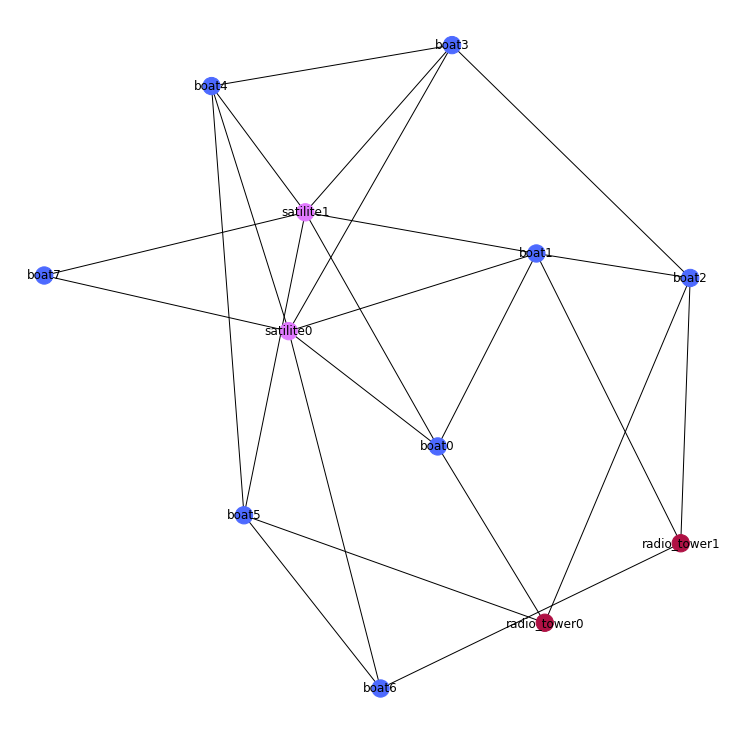

In [43]:
r.seed(student_seed)
boat_count = r.randint(4,9)
satellite_count = r.randint(1,3)
radio_tower_count = r.randint(2,5)

vdesGraph = VDESGraph(boat_count,satellite_count,radio_tower_count)
vdesGraph.draw()